### More Modeling

- Try a Bayesian approach
- Look at classifiers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pymc3 as pm
import arviz as az

In [4]:
data = pd.read_csv('model_data.csv', index_col=0)

In [5]:
data.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,...,Channel_Networker,Channel_Private Client Group,Sub channel_Affiliated,Sub channel_DCIO,Sub channel_Global,Sub channel_IBD,Sub channel_NACS,Sub channel_Other,Sub channel_RIA,Sub channel_USBT
0,21.0,38.0,0.0,1.0,5.0,5.0,0.0,1.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,20.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


### `pymc3` 



In [9]:
x = np.random.normal(4, 1, size = 1000)

In [11]:
x[:10]

array([2.23824477, 3.98341791, 4.77823744, 4.24197608, 3.36502686,
       4.98764224, 5.6655739 , 4.87530111, 5.77148925, 3.84344145])

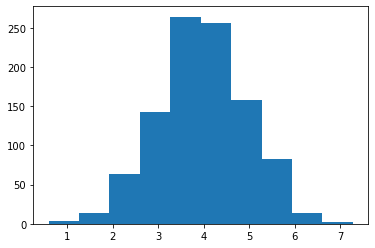

In [13]:
plt.hist(x);

In [14]:
with pm.Model() as dist_model:
    μ = pm.Uniform('μ', lower = 0, upper = 10)
    σ = pm.Uniform('σ', lower = 0, upper = 10)
    
    y = pm.Normal('y', mu = μ, sd = σ, observed = x)
    
    trace = pm.sample(1000)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'μ'}>,
        <AxesSubplot:title={'center':'μ'}>],
       [<AxesSubplot:title={'center':'σ'}>,
        <AxesSubplot:title={'center':'σ'}>]], dtype=object)

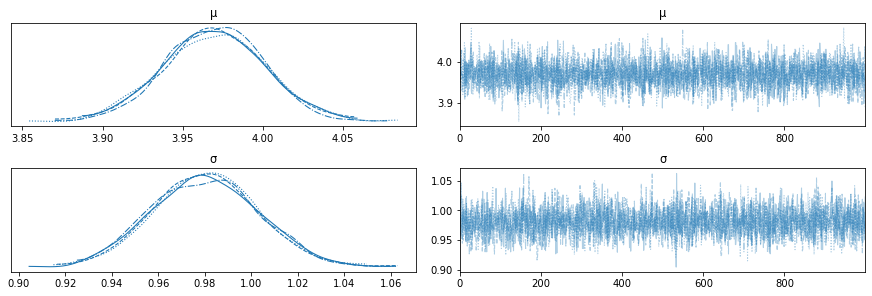

In [15]:
az.plot_trace(trace)

In [17]:
with pm.Model() as dist_model:
    μ = pm.Normal('μ', mu = 3, sd = 1)
    σ = pm.HalfNormal('σ', sd = 4)
    
    y = pm.Normal('y', mu = μ, sd = σ, observed = x)
    
    trace = pm.sample(1000)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'μ'}>,
       <AxesSubplot:title={'center':'σ'}>], dtype=object)

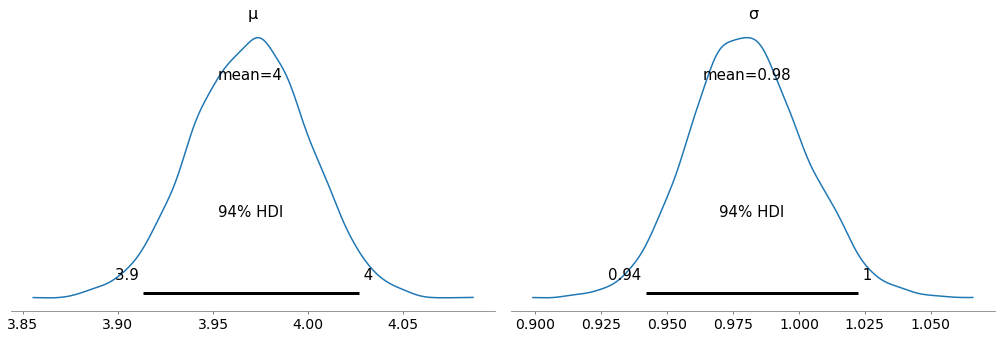

In [18]:
az.plot_posterior(trace)

In [19]:
data.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,...,Channel_Networker,Channel_Private Client Group,Sub channel_Affiliated,Sub channel_DCIO,Sub channel_Global,Sub channel_IBD,Sub channel_NACS,Sub channel_Other,Sub channel_RIA,Sub channel_USBT
0,21.0,38.0,0.0,1.0,5.0,5.0,0.0,1.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,20.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
data.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,...,Channel_Networker,Channel_Private Client Group,Sub channel_Affiliated,Sub channel_DCIO,Sub channel_Global,Sub channel_IBD,Sub channel_NACS,Sub channel_Other,Sub channel_RIA,Sub channel_USBT
0,21.0,38.0,0.0,1.0,5.0,5.0,0.0,1.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,20.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
pos_data = data.loc[(data['AUM'] > 0) & (data['total_sales'] > 0)]

In [47]:
X = pos_data['AUM']
y = np.log1p(pos_data['sales_2019'])

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


$$y = \beta_0 + \beta_1x + \epsilon$$

(array([496.,   5.,  41., 121., 308., 585., 815., 677., 244.,  33.]),
 array([ 0.        ,  1.77007044,  3.54014088,  5.31021133,  7.08028177,
         8.85035221, 10.62042265, 12.39049309, 14.16056353, 15.93063398,
        17.70070442]),
 <BarContainer object of 10 artists>)

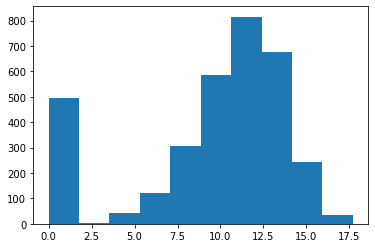

In [50]:
plt.hist(y)

(array([1.000e+00, 1.000e+00, 2.000e+00, 3.000e+01, 1.390e+02, 5.120e+02,
        1.023e+03, 1.220e+03, 3.860e+02, 1.300e+01]),
 array([-3.21887582, -0.97461195,  1.26965193,  3.51391581,  5.75817969,
         8.00244357, 10.24670745, 12.49097133, 14.7352352 , 16.97949908,
        19.22376296]),
 <BarContainer object of 10 artists>)

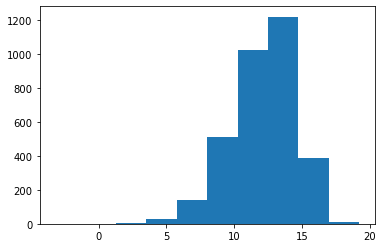

In [52]:
plt.hist(np.log(X))

In [53]:
x = np.log(X)
yt = np.log1p(y)

In [55]:
with pm.Model() as tester:
    σ = pm.HalfNormal('σ', sd = 20)
    
    b0 = pm.Normal('b0', mu = 0, sd = 10)
    b1 = pm.Normal('b1', mu = 10, sd = 30)
    
    line = b0 + b1*x
    
    y = pm.Normal('y', mu = line, sd = σ, observed = yt)
    trace = pm.sample(1000)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/model.py:1754: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_missing, b1, b0, σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'b0'}>,
        <AxesSubplot:title={'center':'b0'}>],
       [<AxesSubplot:title={'center':'b1'}>,
        <AxesSubplot:title={'center':'b1'}>],
       [<AxesSubplot:title={'center':'y_missing'}>,
        <AxesSubplot:title={'center':'y_missing'}>],
       [<AxesSubplot:title={'center':'σ'}>,
        <AxesSubplot:title={'center':'σ'}>]], dtype=object)

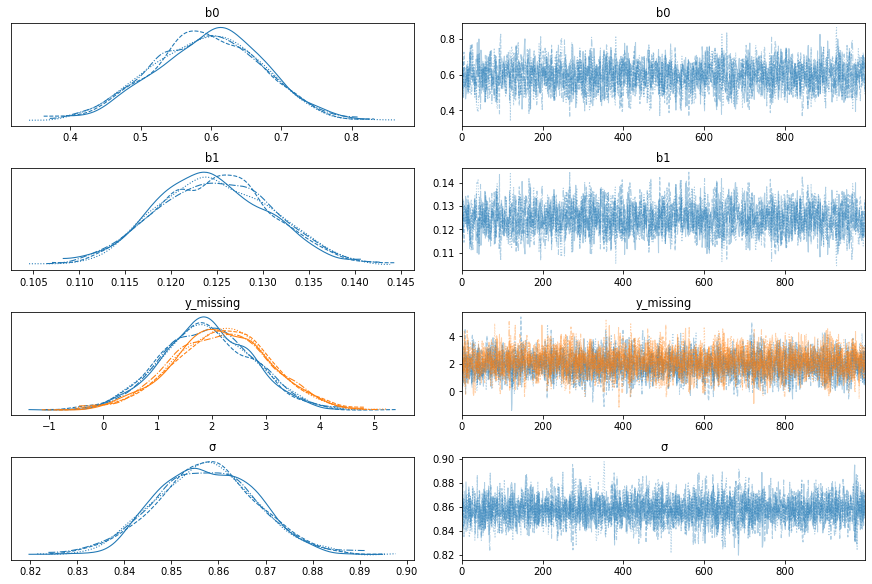

In [56]:
az.plot_trace(trace)

In [57]:
trace['b0'].mean()

0.5946742712724888

In [58]:
trace['b1'].mean()

0.1246604754070794

In [59]:
def l(x):
    return trace['b0'].mean() + trace['b1'].mean()*x

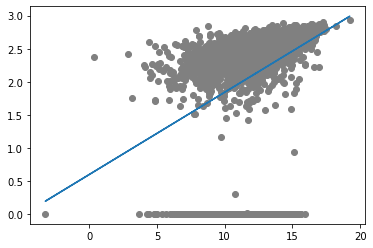

In [61]:
plt.plot(x, l(x))
plt.scatter(x, yt, color = 'gray')

In [64]:
df = pd.DataFrame({'x': x, 'y': yt})

In [65]:
with pm.Model() as try_2:
    pm.glm.GLM.from_formula('y ~ x', df)
    trace = pm.sample(1000)

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, x, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


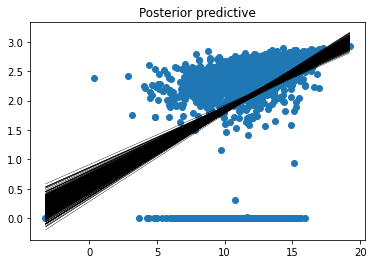

In [68]:
pm.plot_posterior_predictive_glm(trace, samples = 1000, eval = x)
plt.scatter(x, yt)

In [69]:
data.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,...,Channel_Networker,Channel_Private Client Group,Sub channel_Affiliated,Sub channel_DCIO,Sub channel_Global,Sub channel_IBD,Sub channel_NACS,Sub channel_Other,Sub channel_RIA,Sub channel_USBT
0,21.0,38.0,0.0,1.0,5.0,5.0,0.0,1.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,20.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
y = np.where(data['new_fund_2019'] > 0, 1, 0)

### Starting the Classifier

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [93]:
X = data[['total_sales', 'AUM', 'no_of_sales_12M_1']]

In [101]:
lgr = RandomForestClassifier(max_depth=5)
lgr.fit(X, y)

RandomForestClassifier(max_depth=5)

In [102]:
lgr.score(X, y)

0.7564217891054473

In [103]:
pd.value_counts(y, normalize = True)

0    0.748026
1    0.251974
dtype: float64